yolov2发表于2016年，论文名称为"YOLO9000:Better,Faster,Stronger"。首先对yolov1进行了改进，采用了BN、高分辨率训练、卷积代替fc、anchor机制、location prediction、passthrough、multi-scale、高分辨率测试等手段提升检测精度。其次，提出了imagenet与coco联合训练方案，使得检测模型在数据量少的情况下支持更多类别的检测，yolo9000支持9000种类别。

yolov2整体结构如下：
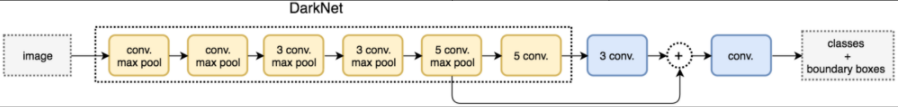

Yolov1的缺点是定位不准确、召回率低，因此Yolov2对于模型的改进如下：
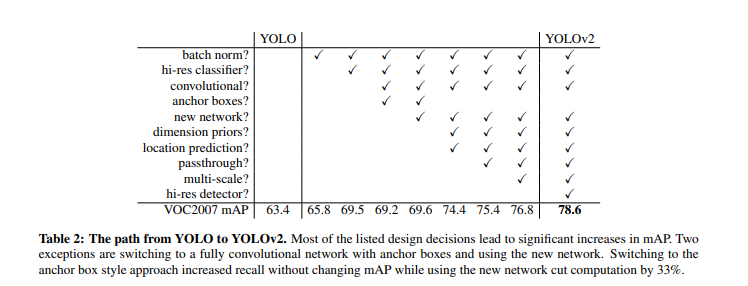

batch norm<br/>
yolov2在所有的层都加入BN，使得精度提升2%.

High resolution classifier<br/>
首先用448x448的imagenet数据在backbone微调10个epoch，然后再用416x416进行检测任务的训练，使得模型逐步适应大尺度，AP提升约4%.

anchor box:<br/>
作者借鉴faster rcnn的做法，采用anchor机制进行检测，使得模型更加容易学习位置信息，最终AP下降0.3个点，但recall由81%提升至88%。yolov2采用416x416的输入，这样最终的输出为13x13（yolo设计网络时，倾向于将输出特征图尺寸设置为奇数，这样有一个中心点，对于一些大物体，其中心点往往落在图像的中心位置，因此设置奇数容易学习这些大物体），每个位置的anchor数量为5个。

demension cluster<br/>
采用k-means算法生成anchor，采用iou作为距离度量：
$$
d(box, cenrtroid) = 1 - IOU(box, centroid)
$$

direct location prediction<br/>
在faster rcnn， ssd等模型中，bbox回归的输出为预测框相对于anchor的偏移与相对与anchor的宽高，而yolov2认为这样中心点偏移量的学习过程不受约束，因此学习较困难。因此yolov2学习预测框相对于网格点的偏移，这样偏移被限定在一个网格之内，更加容易学习：
$$
b_x = \delta(t_x) + c_x \\
b_y = \delta(t_y) + c_y \\
b_w = p_w e^{t_w} \\
b_h = p_h e^{t_h}
$$
采用这种方式，AP提升了接近5个点。

fine-grained feature<br/>
为了提升小目标检测精度，作者将26x26的特征图通过passthrough拼接到13x13的特征图，类似于resnet，为了适配特征图尺寸，作者采用了如下的处理方式，将26x26x512的特征图变为13x13x1024的特征图（实际实现时，用了1x1卷积来适配）。采用passthrough层，最终精度提升了1%.
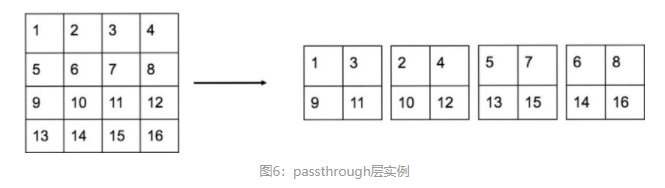

multi-scale training<br/>
每隔一定数量的iteration(文中设为10)，变换一次输入尺寸，变化范围{320,352,...,608}。最终精度最高为78.6%.

darknet19<br/>
作者采用darknet19作为骨干网络，在保持精度的同时提升速度，darknet19结构如下：
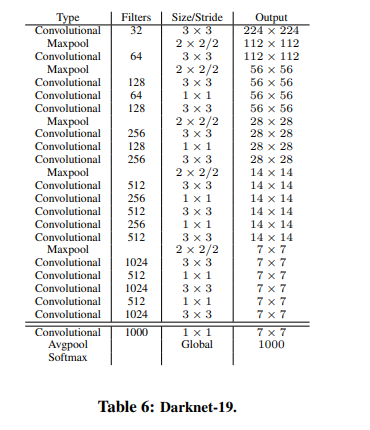

训练策略：<br/>
初始学习率设为0.001，在60与90个epoch以0.1decay<br/>
数据集扩增：random crops,color shifting等。<br/>
loss函数同样采用MSE

yolo9000<br/>
联合训练imagenet与coco，暂时略。